<a href="https://colab.research.google.com/github/dylan-greenberg/Python-Projects-Labs/blob/main/Lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 10

## Outline

Repeat exercises from Lab 9, but with the *Air Quality Daily AQI* dataset.

Pull the latest "Daily AQI by County" file from this link: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

Your target variable is *CATEGORY*, indicating if the air is healthy.  You can focus on either the entire country, split the country in regions, or focus on just one area (ex. Utah).   You can reduce noise by aggregating the data to the month of season level.   

Can you predict the category based on the location and time of year?  

The AQI is divided into six categories:

*Air Quality Index*

|(AQI) Values	|Levels of Health Concern	        |
|---------------|--------|
|0-50	        |Good	 |
|51-100	        |Moderate	 |
|101-150	    |Unhealthy for Sensitive Groups	|
|151 to 200	    |Unhealthy	 |
|201 to 300	    |Very Unhealthy	 |
|301 to 500	    |Hazardous	 |

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the air quality dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Sets/daily_aqi_by_county_2023.csv')
df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2023-01-10,47,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2023-01-11,38,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2023-01-12,30,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2023-01-13,24,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2023-01-14,27,Good,PM2.5,01-003-0010,1


## Prepare Data

➡️ Assignment Tasks
- Create one dummy variable (true/false) for each of the Defining Parameter values    
- Create variables for month and season
- Perform any other data cleanup needed (remove outliers, nulls, etc.)
- Select the data you would like to use in the model.  If you aggregate data, you will have to decide whether to use the min, max or mean value for AQI

In [5]:
df_utah = df[df['State Name'] == 'Utah']
df_utah.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
280475,Utah,Box Elder,49,3,2023-01-01,35,Good,Ozone,49-003-7001,1
280476,Utah,Box Elder,49,3,2023-01-02,34,Good,Ozone,49-003-7001,1
280477,Utah,Box Elder,49,3,2023-01-03,34,Good,Ozone,49-003-7001,1
280478,Utah,Box Elder,49,3,2023-01-04,31,Good,Ozone,49-003-7001,1
280479,Utah,Box Elder,49,3,2023-01-05,27,Good,Ozone,49-003-7001,1


In [6]:
df_utah['Defining Site'].unique()

array(['49-003-7001', '49-003-0005', '49-005-0007', '49-007-1003',
       '49-011-0004', '49-013-0002', '49-013-7011', '49-017-0101',
       '49-019-0007', '49-021-0005', '49-035-3006', '49-035-3016',
       '49-035-4002', '49-035-3014', '49-035-3015', '49-035-3010',
       '49-035-2005', '49-035-3013', '49-037-0101', '49-037-0004',
       '49-045-0004', '49-047-2003', '49-047-1004', '49-047-1002',
       '49-047-7022', '49-047-2002', '49-047-9000', '49-049-5010',
       '49-049-4001', '49-053-0130', '49-053-0007', '49-055-9000',
       '49-057-1003'], dtype=object)

In [7]:
print(df_utah['Defining Parameter'].unique())

['Ozone' 'NO2' 'PM2.5' 'PM10']


In [8]:
df_utah = pd.get_dummies(df_utah, columns=['Defining Parameter'], drop_first=False)
df_utah.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Site,Number of Sites Reporting,Defining Parameter_NO2,Defining Parameter_Ozone,Defining Parameter_PM10,Defining Parameter_PM2.5
280475,Utah,Box Elder,49,3,2023-01-01,35,Good,49-003-7001,1,False,True,False,False
280476,Utah,Box Elder,49,3,2023-01-02,34,Good,49-003-7001,1,False,True,False,False
280477,Utah,Box Elder,49,3,2023-01-03,34,Good,49-003-7001,1,False,True,False,False
280478,Utah,Box Elder,49,3,2023-01-04,31,Good,49-003-7001,1,False,True,False,False
280479,Utah,Box Elder,49,3,2023-01-05,27,Good,49-003-7001,1,False,True,False,False


In [9]:
df_utah['Month'] = pd.DatetimeIndex(df_utah['Date']).month
df_utah.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Site,Number of Sites Reporting,Defining Parameter_NO2,Defining Parameter_Ozone,Defining Parameter_PM10,Defining Parameter_PM2.5,Month
280475,Utah,Box Elder,49,3,2023-01-01,35,Good,49-003-7001,1,False,True,False,False,1
280476,Utah,Box Elder,49,3,2023-01-02,34,Good,49-003-7001,1,False,True,False,False,1
280477,Utah,Box Elder,49,3,2023-01-03,34,Good,49-003-7001,1,False,True,False,False,1
280478,Utah,Box Elder,49,3,2023-01-04,31,Good,49-003-7001,1,False,True,False,False,1
280479,Utah,Box Elder,49,3,2023-01-05,27,Good,49-003-7001,1,False,True,False,False,1


In [10]:
df_utah.describe()

,State Code,County Code,AQI,Number of Sites Reporting,Month
count,5229.0,5229.000000,5229.000000,5229.000000,5229.000000
mean,49.0,29.244789,48.410021,2.044368,6.614458
std,0.0,18.946743,21.295310,1.970503,3.426704
min,49.0,3.000000,0.000000,1.000000,1.000000
25%,49.0,11.000000,38.000000,1.000000,4.000000
50%,49.0,35.000000,45.000000,1.000000,7.000000
75%,49.0,47.000000,54.000000,2.000000,10.000000
max,49.0,57.000000,215.000000,8.000000,12.000000


In [11]:
df_utah.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5229 entries, 280475 to 285703
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   State Name                 5229 non-null   object
 1   county Name                5229 non-null   object
 2   State Code                 5229 non-null   int64 
 3   County Code                5229 non-null   int64 
 4   Date                       5229 non-null   object
 5   AQI                        5229 non-null   int64 
 6   Category                   5229 non-null   object
 7   Defining Site              5229 non-null   object
 8   Number of Sites Reporting  5229 non-null   int64 
 9   Defining Parameter_NO2     5229 non-null   bool  
 10  Defining Parameter_Ozone   5229 non-null   bool  
 11  Defining Parameter_PM10    5229 non-null   bool  
 12  Defining Parameter_PM2.5   5229 non-null   bool  
 13  Month                      5229 non-null   int32 
dtypes: boo

In [12]:
df_utah['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [13]:
df_utah['Season'] = df_utah['Month'].map({12:'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring', 6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall', 11:'Fall'})
df_utah.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Site,Number of Sites Reporting,Defining Parameter_NO2,Defining Parameter_Ozone,Defining Parameter_PM10,Defining Parameter_PM2.5,Month,Season
280475,Utah,Box Elder,49,3,2023-01-01,35,Good,49-003-7001,1,False,True,False,False,1,Winter
280476,Utah,Box Elder,49,3,2023-01-02,34,Good,49-003-7001,1,False,True,False,False,1,Winter
280477,Utah,Box Elder,49,3,2023-01-03,34,Good,49-003-7001,1,False,True,False,False,1,Winter
280478,Utah,Box Elder,49,3,2023-01-04,31,Good,49-003-7001,1,False,True,False,False,1,Winter
280479,Utah,Box Elder,49,3,2023-01-05,27,Good,49-003-7001,1,False,True,False,False,1,Winter


In [14]:
df_utah['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

## Create Regression

➡️ Assignment Tasks
- Create a simple linear regression to predict AQI based on as many variables as you can use or derive.  (for example, sklearn LinearRegression)
- Visualize the regression with at least one of the variables

In [15]:
df_utah = pd.get_dummies(df_utah, columns=['Category', 'Season'], drop_first=True)

In [16]:
df_utah.head()

,State Name,county Name,State Code,County Code,Date,AQI,Defining Site,Number of Sites Reporting,Defining Parameter_NO2,Defining Parameter_Ozone,Defining Parameter_PM10,Defining Parameter_PM2.5,Month,Category_Moderate,Category_Unhealthy,Category_Unhealthy for Sensitive Groups,Category_Very Unhealthy,Season_Spring,Season_Summer,Season_Winter
280475,Utah,Box Elder,49,3,2023-01-01,35,49-003-7001,1,False,True,False,False,1,False,False,False,False,False,False,True
280476,Utah,Box Elder,49,3,2023-01-02,34,49-003-7001,1,False,True,False,False,1,False,False,False,False,False,False,True
280477,Utah,Box Elder,49,3,2023-01-03,34,49-003-7001,1,False,True,False,False,1,False,False,False,False,False,False,True
280478,Utah,Box Elder,49,3,2023-01-04,31,49-003-7001,1,False,True,False,False,1,False,False,False,False,False,False,True
280479,Utah,Box Elder,49,3,2023-01-05,27,49-003-7001,1,False,True,False,False,1,False,False,False,False,False,False,True


In [17]:
df_utah.columns

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Defining Site', 'Number of Sites Reporting', 'Defining Parameter_NO2',
       'Defining Parameter_Ozone', 'Defining Parameter_PM10',
       'Defining Parameter_PM2.5', 'Month', 'Category_Moderate',
       'Category_Unhealthy', 'Category_Unhealthy for Sensitive Groups',
       'Category_Very Unhealthy', 'Season_Spring', 'Season_Summer',
       'Season_Winter'],
      dtype='object')

In [18]:
x = df_utah.drop(columns=['Date', 'AQI', 'Defining Site', 'State Name', 'county Name'])
y = df_utah['AQI']


In [19]:
x.columns

Index(['State Code', 'County Code', 'Number of Sites Reporting',
       'Defining Parameter_NO2', 'Defining Parameter_Ozone',
       'Defining Parameter_PM10', 'Defining Parameter_PM2.5', 'Month',
       'Category_Moderate', 'Category_Unhealthy',
       'Category_Unhealthy for Sensitive Groups', 'Category_Very Unhealthy',
       'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
MSE = sk.metrics.mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'MSE: {MSE}')

R-squared: 0.7605619238473065
MSE: 100.8564608222868


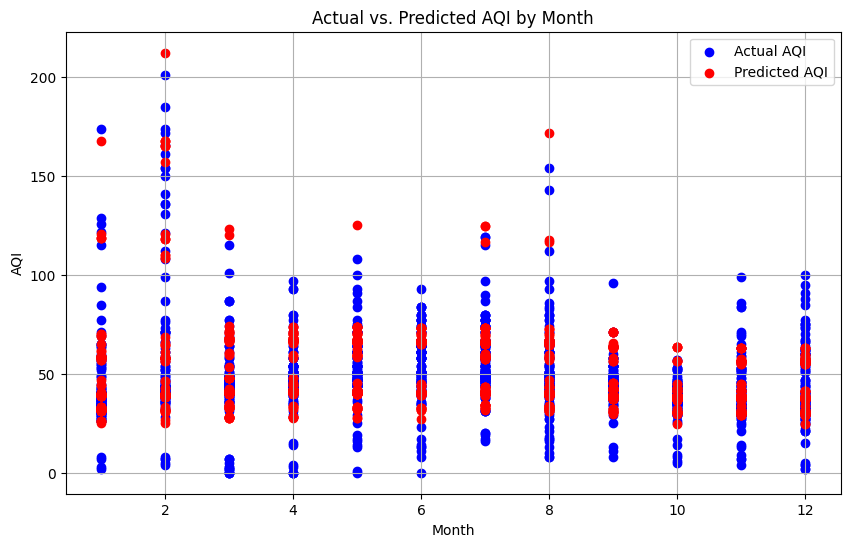

In [23]:
# prompt: please generate a visual of the created regression

import matplotlib.pyplot as plt

# Assuming 'Month' is one of your features and you want to visualize its relationship with AQI
plt.figure(figsize=(10, 6))
plt.scatter(x_test['Month'], y_test, color='blue', label='Actual AQI')  # Use x_test for the visualization
plt.scatter(x_test['Month'], y_pred, color='red', label='Predicted AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI by Month')
plt.legend()
plt.grid(True)
plt.show()

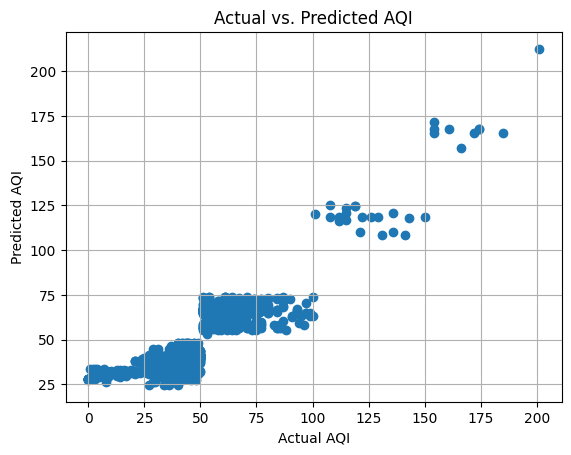

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs. Predicted AQI')
plt.grid(True)
plt.show()

## Make a prediction

➡️ Assignment Tasks
- What would you predict the average AQI to be in the month of January?  

In [25]:
df_utah_jan = df_utah[df_utah['Month'] == 1]
df_utah_jan.head()

average_values = df_utah_jan[[
    'State Code',
    'County Code',
    'Number of Sites Reporting',
    'Defining Parameter_NO2',
    'Defining Parameter_Ozone',
    'Defining Parameter_PM10',
    'Defining Parameter_PM2.5',
    'Month',
    'Category_Moderate',
    'Category_Unhealthy',
    'Category_Unhealthy for Sensitive Groups',
    'Category_Very Unhealthy',
    'Season_Spring',
    'Season_Summer',
    'Season_Winter'
]].mean()

january_df = pd.DataFrame([average_values])

predicted_aqi = model.predict(january_df)
print(f'Predicted AQI for January: {predicted_aqi[0]}')

Predicted AQI for January: 45.27152871075669


## OPTIONAL: Compare Air Quality

➡️ Assignment Tasks
- Download the data from a year 20 years prior, using this website: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
- Append the new data to the previous dataframe
- Use the year as a variable in your regression.  Is year a significant factor in predicting AQI?

In [27]:
df_2004 = pd.read_csv('/content/drive/MyDrive/Data Sets/daily_aqi_by_county_2004.csv')

df_utah_2004 = df_2004[df_2004['State Name'] == 'Utah']


df_2023 = df[df['State Name'] == 'Utah']

df_combined = pd.concat([df_2023, df_utah_2004])


df_combined['Year'] = pd.DatetimeIndex(df_combined['Date']).year
df_combined.head()

x = df_combined[['Year']]
y = df_combined[['AQI']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

combined_model = LinearRegression()
combined_model.fit(x_train, y_train)

y_pred = combined_model.predict(x_test)

r2 = r2_score(y_test, y_pred)
MSE = sk.metrics.mean_squared_error(y_test, y_pred)
print(f'R-squared: {r2}')
print(f'MSE: {MSE}')

# No, year is not at all a significant predictor of AQI


R-squared: 0.0013929150055025374
MSE: 615.5062313996214


<ipython-input-27-11adf2073355>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2004 = pd.read_csv('/content/drive/MyDrive/Data Sets/daily_aqi_by_county_2004.csv')
